In [14]:
# Dependencies
import csv
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint
import numpy as np

## CROSSREF INFORMATION
### We started in CrossRef to run APIs on affiliation - returned over 6m items - issues documented in notes.

In [15]:
## Set up etiquette file with identifying information in .py to include in calls:
    # project_email = Etiquette("Data Analytics Bootcamp, Project 1", "Project Version Testing", "mailto:cwittig@richmond.edu")

from crossref.restful import Works
from crossref.restful import Journals

#renames Works collection and counts - all items searchable in CrossRef
works = Works()
works.count()


105669946

## CrossRef produced too many results
## Used Web of Science to create usable dataset - UR Publications (4,708)

### Information below uses csv file from Web of Science results

In [16]:
ur_pubs_old = pd.read_csv("UR_KAN_pubs.csv")
ur_pubs_old.head()

#Convert the Publication Year to an Integer without a decimal float
ur_pubs_old["Publication Year"] = ur_pubs_old["Publication Year"].fillna(0.0).astype(int)

ur_pubs_old


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,10,11,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

,Authors,Title,Journal Title,Volume,Issue,Beginning Page,Ending Page,DOI,Publication Date,Publication Year,...,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285
0,"Mago, Shakun D.; Sheremeta, Roman M.",New Hampshire Effect: behavior in sequential a...,EXPERIMENTAL ECONOMICS,22,2,325,349,10.1007/s10683-018-9569-0,19-Jun,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Kotler, Philip; Manrai, Lalita A.; Lascu, Dana...",Influence of country and company characteristi...,INTERNATIONAL BUSINESS REVIEW,28,3,482,498,10.1016/j.ibusrev.2018.11.006,19-Jun,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Joshi, Piyush; Darr, Andrew J.; Skromne, Isaac",CDX4 regulates the progression of neural matur...,DEVELOPMENTAL BIOLOGY,449,2,132,142,10.1016/j.ydbio.2019.02.014,MAY 15 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Park, Hyejin; McEachon, Joseph D., II; Pollock...",Synthesis and characterization of hydrogen per...,BIOORGANIC & MEDICINAL CHEMISTRY,27,10,2075,2082,10.1016/j.bmc.2019.04.003,MAY 15 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Duer, M.; Schmidt, A.; Pybus, J. R.; Segarra, ...",Direct Observation of Proton-Neutron Short-Ran...,PHYSICAL REVIEW LETTERS,122,17,NaN,NaN,10.1103/PhysRevLett.122.172502,MAY 3 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Burnette, Jeni L.; Forsyth, Rachel B.; Desmara...",MINDSETS OF ADDICTION: IMPLICATIONS FOR TREATM...,JOURNAL OF SOCIAL AND CLINICAL PSYCHOLOGY,38,5,367,394,10.1521/jscp.2019.38.5.367,19-May,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Roy, P.; Park, S.; Crede, V.; Anisovich, A. V....",First Measurements of the Double-Polarization ...,PHYSICAL REVIEW LETTERS,122,16,NaN,NaN,10.1103/PhysRevLett.122.162301,APR 23 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Kentner, Amanda C.; Lambert, Kelly G.; Hannan,...",Editorial: Environmental Enrichment: Enhancing...,FRONTIERS IN BEHAVIORAL NEUROSCIENCE,13,NaN,NaN,NaN,10.3389/fnbeh.2019.00075,APR 16 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Aldana, Elis; Otalora-Luna, Fernando","Artistic Notion of Mimicry, a Case Study: Does...",BIOSEMIOTICS,12,1,157,174,10.1007/s12304-019-09351-1,19-Apr,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Meyer, Manuella",MADHOUSE: PSYCHIATRY AND POLITICS IN CUBAN HIS...,JOURNAL OF THE HISTORY OF THE BEHAVIORAL SCIENCES,55,2,167,169,10.1002/jhbs.21968,19-Apr,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Deleted unnecessary columns

ur_pubs = ur_pubs_old[["Author 1", "Author 2", "Author 3", "Author 4", "Author 5", "Title", "Journal Title", "Volume", "Issue", "DOI", "Publication Date", "Publication Year"]]

ur_pubs.head()
#ur_pubs.count()

,Author 1,Author 2,Author 3,Author 4,Author 5,Title,Journal Title,Volume,Issue,DOI,Publication Date,Publication Year
0,"Mago, Shakun D.","Sheremeta, Roman M.",NaN,NaN,NaN,New Hampshire Effect: behavior in sequential a...,EXPERIMENTAL ECONOMICS,22,2,10.1007/s10683-018-9569-0,19-Jun,2019
1,"Kotler, Philip","Manrai, Lalita A.","Lascu, Dana-Nicoleta","Manrai, Ajay K.",NaN,Influence of country and company characteristi...,INTERNATIONAL BUSINESS REVIEW,28,3,10.1016/j.ibusrev.2018.11.006,19-Jun,2019
2,"Joshi, Piyush","Darr, Andrew J.","Skromne, Isaac",NaN,NaN,CDX4 regulates the progression of neural matur...,DEVELOPMENTAL BIOLOGY,449,2,10.1016/j.ydbio.2019.02.014,MAY 15 2019,2019
3,"Park, Hyejin","McEachon, Joseph D., II","Pollock, Julie A.",NaN,NaN,Synthesis and characterization of hydrogen per...,BIOORGANIC & MEDICINAL CHEMISTRY,27,10,10.1016/j.bmc.2019.04.003,MAY 15 2019,2019
4,"Duer, M.","Schmidt, A.","Pybus, J. R.","Segarra, E. P.","Hrnjic, A.",Direct Observation of Proton-Neutron Short-Ran...,PHYSICAL REVIEW LETTERS,122,17,10.1103/PhysRevLett.122.172502,MAY 3 2019,2019


In [18]:
#Grouped journals by title

journal_grouping = ur_pubs.groupby(['Journal Title'])
journal_grouping.count()

,Author 1,Author 2,Author 3,Author 4,Author 5,Title,Volume,Issue,DOI,Publication Date,Publication Year
Journal Title,,,,,,,,,,,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2,2,2,0,0,2,2,2,2,2,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188,137,95,64,38,188,188,9,0,188,188
ACADEMIC THERAPY,1,0,0,0,0,1,1,1,1,1,1
ACADEMY OF MANAGEMENT ANNALS,1,1,1,1,1,1,1,0,1,1,1
ACADEMY OF MANAGEMENT EXECUTIVE,2,2,2,1,0,2,2,2,2,2,2
ACADEMY OF MANAGEMENT JOURNAL,3,3,3,0,0,3,3,3,2,3,3
ACADEMY OF MANAGEMENT LEARNING & EDUCATION,1,1,1,0,0,1,1,1,1,1,1
ACADEMY OF MANAGEMENT PERSPECTIVES,2,2,2,2,1,2,2,2,2,2,2
ACADEMY OF MANAGEMENT REVIEW,7,5,4,2,1,7,7,7,6,7,7


In [19]:
#Grouped by Journal title -- and counted the individual publications within each journal

journal_grouping = ur_pubs.groupby(['Journal Title']).count()[["Title"]]
journal_grouping.head()

,Title
Journal Title,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
ACADEMIC THERAPY,1
ACADEMY OF MANAGEMENT ANNALS,1
ACADEMY OF MANAGEMENT EXECUTIVE,2


In [40]:
#Sorted Journal Titles by # of publications - Highest to Lowest

journal_sort = journal_grouping.sort_values(["Title"], ascending=False)
top_journal_sort=journal_sort.nlargest(10, ['Title'], keep="first")
top_journal_sort

,Title
Journal Title,
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
PHYSICAL REVIEW C,145
FASEB JOURNAL,136
LIBRARY JOURNAL,70
PHYSICAL REVIEW LETTERS,60
AMERICAN HISTORICAL REVIEW,36
JOURNAL OF AMERICAN HISTORY,34
PERCEPTUAL AND MOTOR SKILLS,32
WILLIAM AND MARY QUARTERLY,31


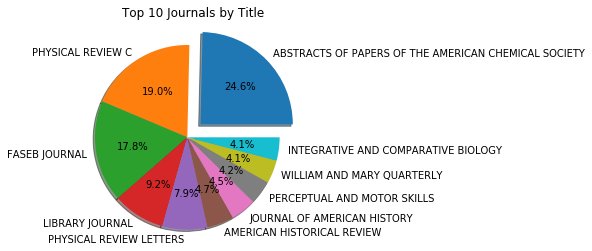

In [46]:
# labels=top_journal_sort["Journal Title"]
labels=top_journal_sort.index.values
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(top_journal_sort["Title"],labels=labels, explode = explode, shadow = True, startangle = 0, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Top 10 Journals by Title")
plt.show()
# Save Figure
# plt.savefig("../Images/Pyber_KAN_pie1.png")

In [22]:
#Identified TOTAL publications per year

yearly_publications = ur_pubs.groupby(["Publication Year"]).count()[["Title"]]
cleaned_yearly_publications=yearly_publications.drop([0])
clean_yearly_pubs=cleaned_yearly_publications.drop([2019])
clean_yearly_pubs.head()



,Title
Publication Year,
1976,20
1977,20
1978,37
1979,34
1980,48


<function matplotlib.pyplot.show(*args, **kw)>

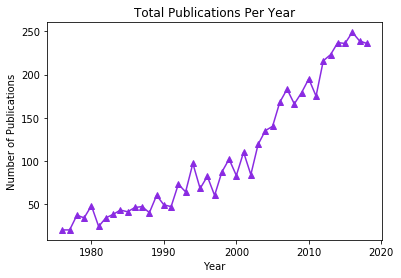

In [23]:
plt.plot(clean_yearly_pubs, marker = "^", c="blueviolet")
plt.title("Total Publications Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.show

In [24]:
#Identified and sorted publications per journal per year

yearly_publications = ur_pubs.groupby(["Publication Year", "Journal Title"]).count()[["Title"]]
yearly_publications.head()

Title
Publication Year Journal Title                         
1976             AMERICAN MATHEMATICAL MONTHLY        1
                 COPEIA                               1
                 ELH-ENGLISH LITERARY HISTORY         1
                 FEDERATION PROCEEDINGS               1
                 JOURNAL OF EXPERIMENTAL ZOOLOGY      2

In [25]:
# pubs per year as line

In [26]:
#journal name as pie